### Classification Predict Student Solution

© Explore Data Science Academy

Climate Change Tweet Classification Predict

---
### Authors:
* Magoma Happy Anza 
* Yamkela Mhlengi Jojo
* Nkosinomusa Londeka Masango
* Thabatha Sylvia Nompoko
* Nompumezo Sikhukhu
*  Noluthando Mpetshwa

### Predict Overview: EA Twitter Sentiment classification.

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technicsetal audience.

Formally the problem statement

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change.Below you will find information about the data source and a brief data description. You can have a look at word clouds and other general EDA on the EDA page, and make your predictions on the prediction page that you can navigate to in the sidebar.
 

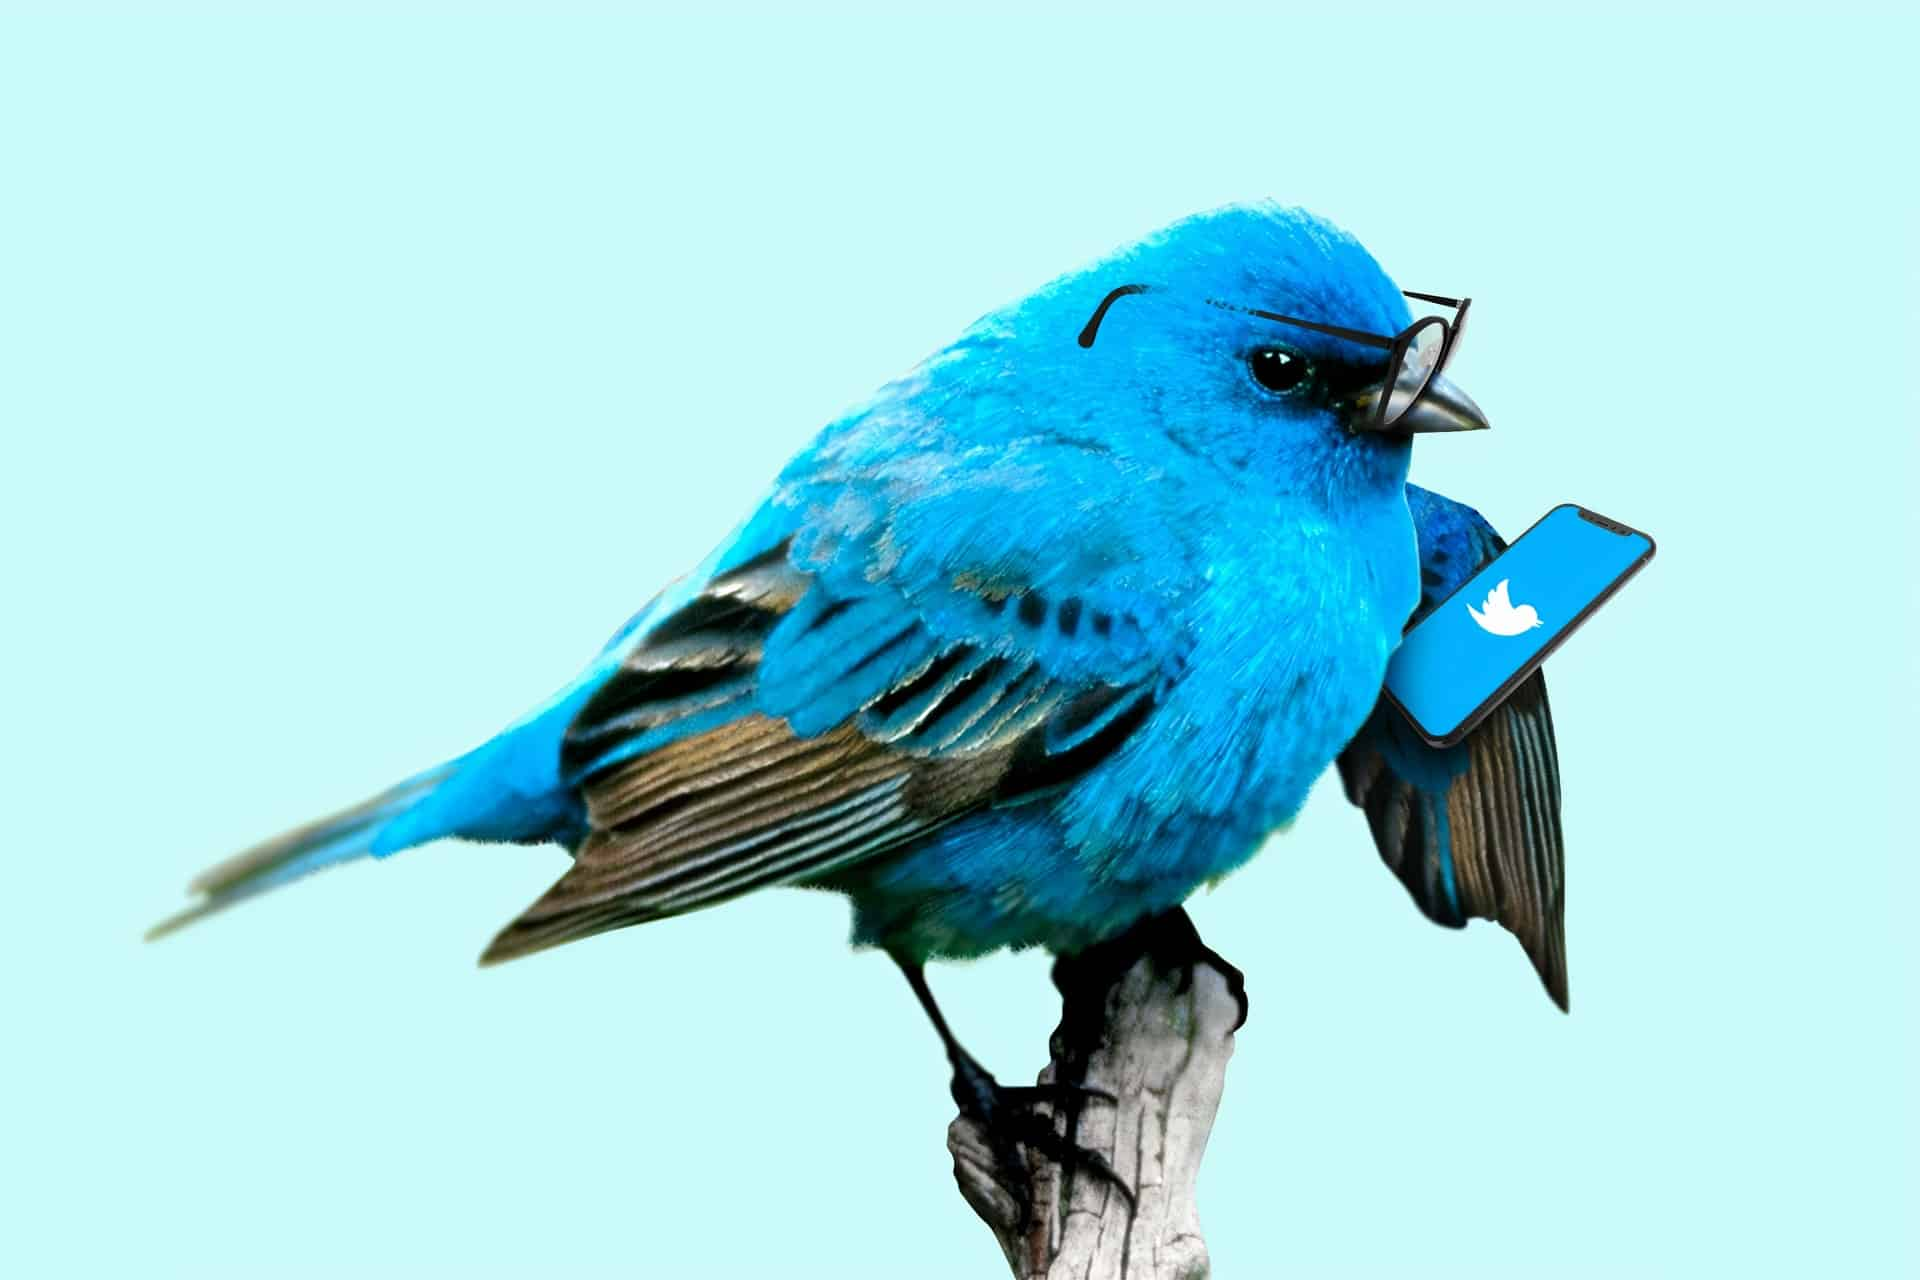

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction 

Climate change has emerged as one of the most pressing challenges of our time, with its far-reaching impacts extending across ecosystems, economies, and societies worldwide. As the global community grapples with the urgency of addressing climate change, social media platforms have become crucial arenas for public discourse, activism, and awareness-raising on environmental issues. Amidst the deluge of tweets discussing climate change, there exists a need to sift through this vast sea of information and classify tweets based on their content, sentiment, or relevance to specific aspects of climate change.In response to this challenge, we present a Climate Change Tweet Classification Predictor—a machine learning model designed to automatically categorize tweets related to climate change. By harnessing the power of natural language processing (NLP) and supervised learning techniques, our predictor aims to analyze and categorize tweets into distinct classes, such as "Supportive", "Skeptical", "Action-oriented", or "Informational". This classification system can provide valuable insights into public attitudes, beliefs, and sentiments surrounding climate change, thereby informing policymakers, researchers, and advocacy groups in their efforts to address this global crisis effectively.

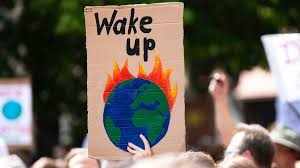

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
#External libraries
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model
import seaborn as sns
import warnings

#Standard Library and Built-in Modules
import joblib
import os
import string
import pickle




C:\Users\Happy\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#conveting word into numbers.

betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5,
                             ngram_range=(1, 1))

# Setting up comet

Comet.ml is a platform that provides tools for machine learning experimentation and collaboration.It  allows you to track your machine learning experiments. It logs various parameters, metrics, and other relevant information about your experiments, helping you keep track of what you've tried and what results you've obtained. You can visualize and analyze the results of your experiments. It provides various visualization tools to help you understand your model's performance and behavior better.

In [ ]:
experiment = Experiment(
  api_key="73OdOz1ruhNLhiqsjlAHOmS19",
  project_name="classification-project",
  workspace="m-anza",
   

)
experiment.set_name( "svc")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
raw = pd.read_csv("train.csv", encoding='utf-8')

In [4]:
kg_df = pd.read_csv('test_with_no_labels.csv')

The data that we loaded was from the kaggle 

In [5]:
df_copy = raw.copy()

In [6]:
kg_copy = kg_df.copy()

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
raw.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


View the first 5 rows of the data

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Checking the data type 

In [9]:
raw.shape

(15819, 3)

In [10]:
raw.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Checking for null values 

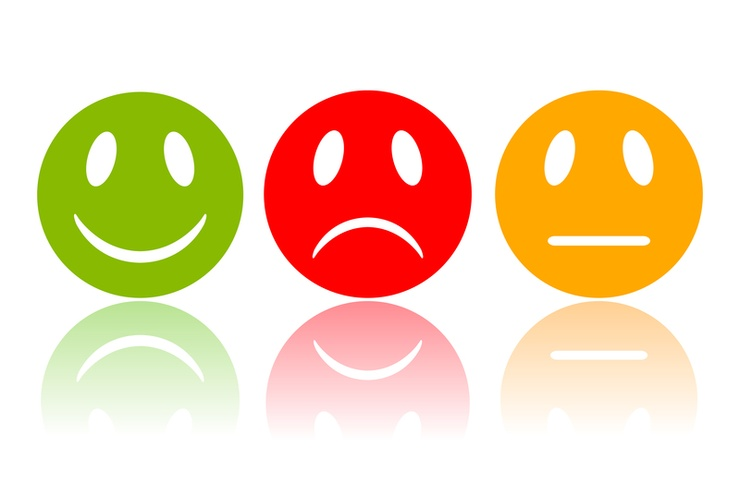

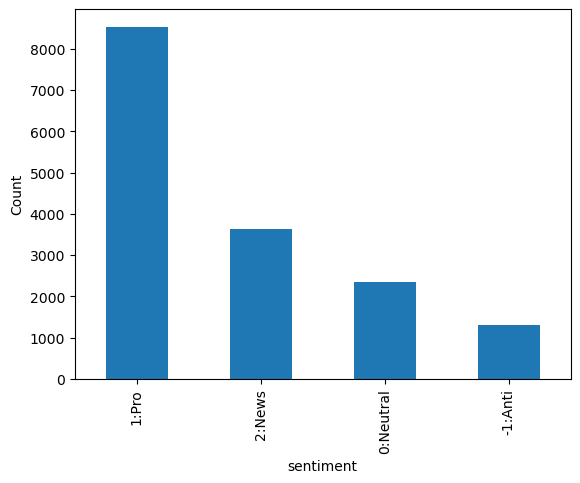

In [11]:
sentiment_labels = {
    '-1': '-1:Anti',
    '0': '0:Neutral',
    '1': '1:Pro',
    '2': '2:News'
}

ax = raw['sentiment'].value_counts().plot(kind='bar')
unique_sentiments = raw['sentiment'].unique()
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in unique_sentiments])

for i, v in enumerate(raw['sentiment'].value_counts()):
    label = sentiment_labels.get(str(i), 'Unknown')
    
ax.set_ylabel('Count')

plt.show()




The bar graph shows the imbalance between the sentiments.Many tweets falled under 'the tweet supports the belief of man-made climate change(Pro)' with more than 8000 tweets, and more than 1500 tweets was 'the tweet does not believe in man-made climate change (anti)'. The different between sentiment 1:pro and sentiment -1:anti makes a huge imbalance.

In [12]:
#Checking the hastags
hashtag_list = []  

for message in raw["message"]:
    if message: 
        tags = message.split() 
        for tag in tags:
            tag = "#" + tag.strip(",")  
            tag = tag.lower()  
            hashtag_list.append(tag) 

print(hashtag_list[:20])  


['#polyscimajor', '#epa', '#chief', "#doesn't", '#think', '#carbon', '#dioxide', '#is', '#main', '#cause', '#of', '#global', '#warming', '#and..', '#wait', '#what!?', '#https://t.co/yelvcefxkc', '#via', '#@mashable', "#it's"]


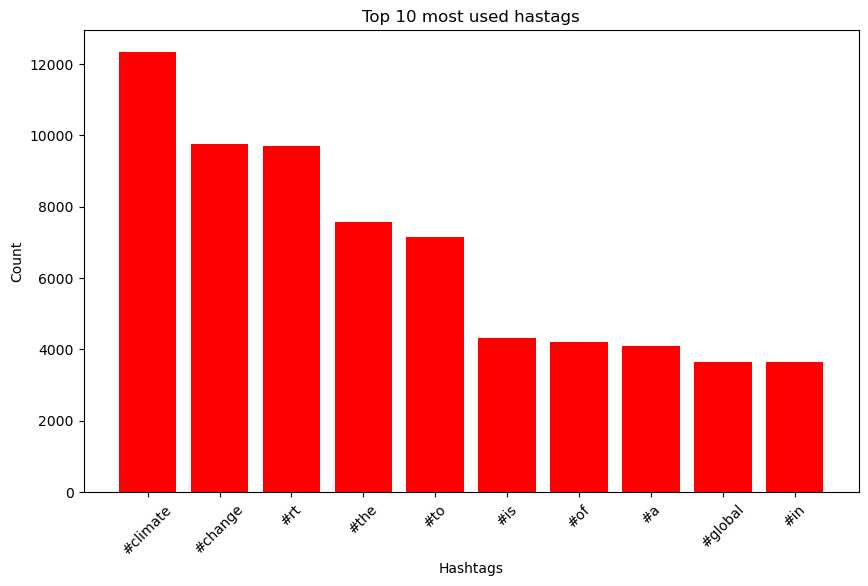

In [13]:
#hashtage bar graph
hashtag_counts = Counter(hashtag_list)
top_hashtags = hashtag_counts.most_common(10)
hashtags, counts = zip(*top_hashtags)

plt.figure(figsize=(10, 6))
plt.bar(hashtags, counts, color='red')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 most used hastags')
plt.xticks(rotation=45)

plt.show()



 We have created a bargraph to show us the hastags how many times one hastags was used,and the hastags with the highest number was #climate with more than 12000, followed by #change with close to 10000.

In [14]:
raw.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [15]:
word_count = raw['message'].apply(lambda x: len(x.split()))
raw['word_count'] = word_count


<Figure size 1400x800 with 0 Axes>

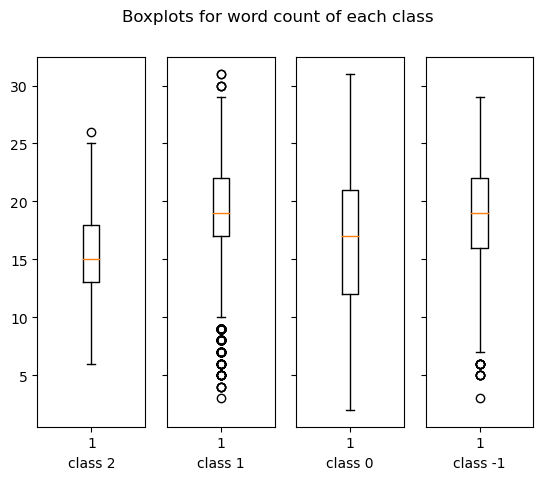

In [16]:
# create subplots
plt.figure(figsize=(14,8))
fig,axs = plt.subplots(1, 4, sharey = True)

# plot title
fig.suptitle('Boxplots for word count of each class')

# class 2 plot
y2 = raw[raw['sentiment'] == 2]['word_count']
axs[0].boxplot(y2)
axs[0].set_xlabel('class 2')

# class 1 plot
y1 = raw[raw['sentiment'] == 1]['word_count']
axs[1].boxplot(y1)
axs[1].set_xlabel('class 1')

# class 0 plot
y0 =raw[raw['sentiment'] == 0]['word_count']
axs[2].boxplot(y0)
axs[2].set_xlabel('class 0')

# class -1 plot
y_1 = raw[raw['sentiment'] == -1]['word_count']
axs[3].boxplot(y_1)
axs[3].set_xlabel('class -1')

plt.show()

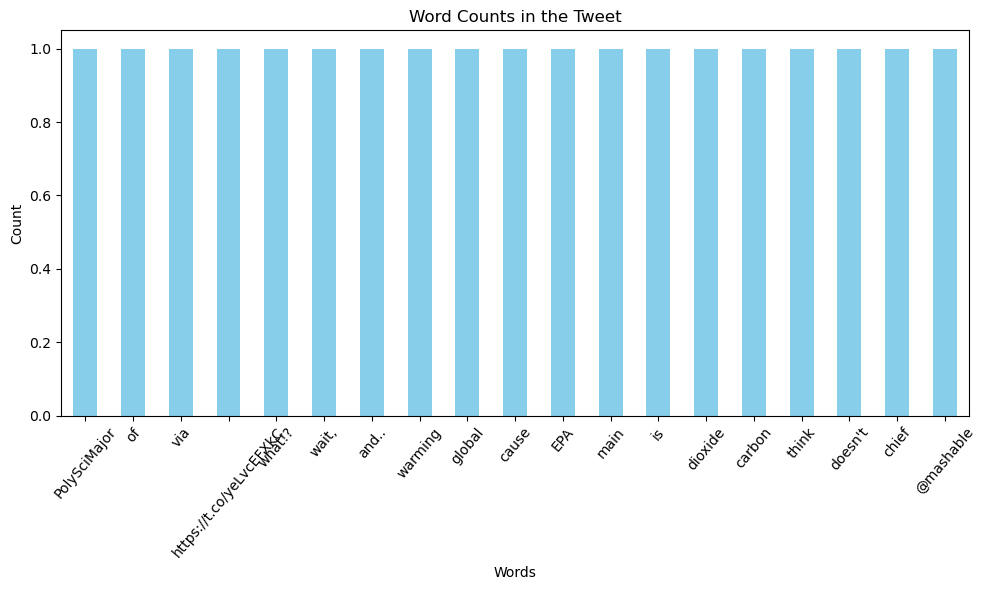

In [17]:
tweet = raw['message'].iloc[0]
words = tweet.split()
word_counts = {}
for word in words:
    word_counts[word] = word_counts.get(word, 0) + 1
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
word_counts_df['count'].plot(kind='bar', color='skyblue')
plt.title('Word Counts in the Tweet')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In the graph 'word count in the tweets' we count the words that apears most in the tweets.

In [17]:
raw['punct_count']  = raw['message'].apply(lambda x: len([i for i in x if i in string.punctuation]))

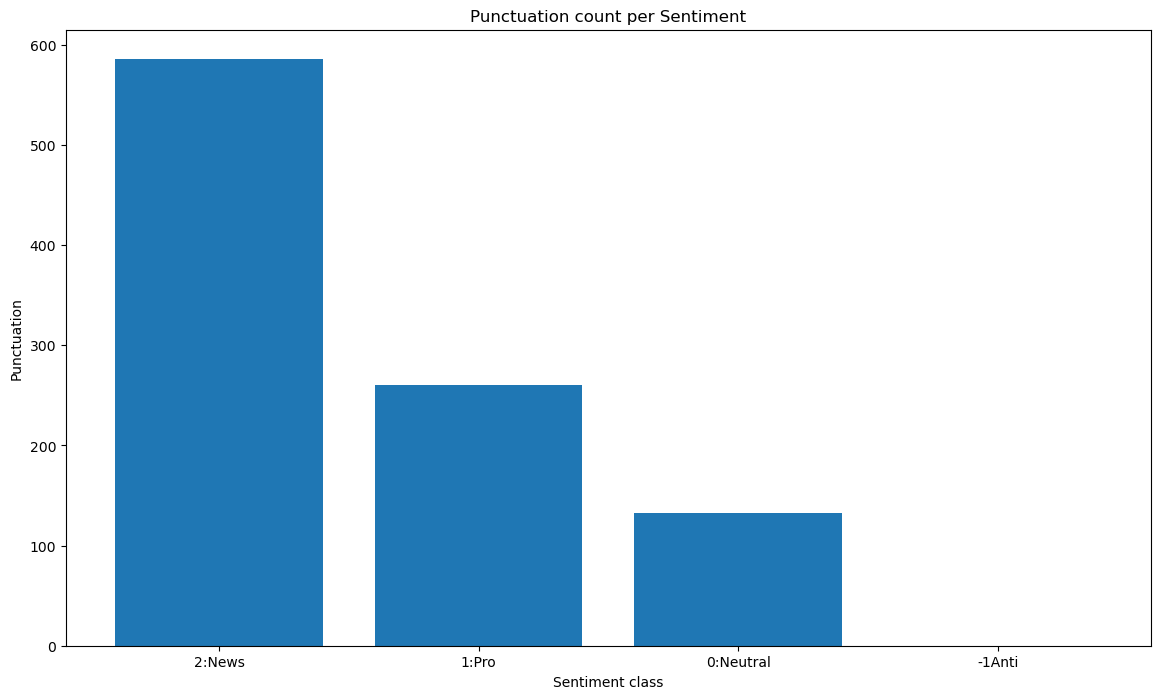

In [18]:
##Punctuation count

# Punctuation count visualization
news=raw[raw.punct_count == 2].shape[0]
pro =raw[raw.punct_count == 1].shape[0]
neutral=raw[raw.punct_count == 0].shape[0]
anti =raw[raw.punct_count == -1].shape[0]

plt.figure(figsize=(14, 8))
plt.bar(["2:News", "1:Pro", "0:Neutral", "-1Anti"], [news, pro, neutral, anti])
plt.xlabel('Sentiment class')
plt.ylabel('Punctuation')
plt.title('Punctuation count per Sentiment')
plt.show()

## 3.1 Text Cleaning

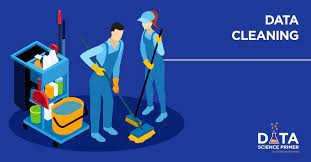

Data cleaning ensures that the data is accurate and consistent. It involves handling missing values, removing duplicates, and correcting errors, which helps maintain the integrity of the dataset.It improves the quality of analysis and modeling. By removing irrelevant or erroneous information, you can ensure that your analyses are based on reliable data, leading to more accurate results and insights.

# 3.1.1Train data cleaning 

In [19]:
#removing numbers
def remove_digits(column_name):
    return re.sub(r'\d+','',column_name)

In [20]:
raw['message']= raw['message'].apply(remove_digits)
raw['message'][700]

"RT @KmiotekC: 'Fighting climate change fights also global injustice ' @DieschbourgC #Greens https://t.co/CfgAVqLg"

In [21]:
#convert tweets to lower case
raw['message']= raw['message'].str.lower()
raw['message']= raw['message'].str.replace('\d+', "")


In [22]:
#removing RT
def remove_RT(column_name):
    return re.sub(r'^rt[\s]+', '',column_name)
    

In [23]:
raw['message']= raw['message'].apply(remove_RT)
raw['message'][4]

"@soynoviodetodas: it's , and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight"

In [24]:
#removing the handles
def remove_handels(post):
    return re.sub('@[^\s]+',' ',post)

In [25]:
raw['message']= raw['message'].apply(remove_handels)
raw.head(10)

,sentiment,message,tweetid,word_count,punct_count
0,1,polyscimajor epa chief doesn't think carbon di...,625221,19,12
1,1,it's not like we lack evidence of anthropogeni...,126103,10,1
2,2,researchers say we have three years to act o...,698562,19,12
3,1,#todayinmaker# wired : was a pivotal year in ...,573736,15,8
4,1,"it's , and a racist, sexist, climate change ...",466954,18,8
5,1,worth a read whether you do or don't believe i...,425577,14,11
6,1,mike pence doesn’t believe in global warming...,294933,16,8
7,1,six big things we can all do today to fight ...,992717,23,8
8,1,my yo nephew is inconsolable. he wants to di...,664510,25,4
9,1,no offense… but like… how do you just not be...,260471,15,2


In [26]:
#removing the url
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
raw['message'] = raw['message'].replace(to_replace = pattern_url,value = " ", regex = True)
print(raw["message"][2])

  researchers say we have three years to act on climate change before it’s too late    …


In [27]:
#removing the hashtags
def remove_hashtages(post):
    return re.sub('#[^\s]+',' ',post)

In [28]:
raw['message']= raw['message'].apply(remove_hashtages)
print(raw["message"][56])

  lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️


In [29]:
#remiving emojis 
def remove_emojis(text):
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

raw['message'] = raw['message'].apply(remove_emojis)
print(raw["message"][56])

  lmao  snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️


In [30]:
def remove_patterns(text):
    patterns_to_remove = [r'snowflakes ❄️', r'🤦‍♂️']
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

raw['message'] = raw['message'].apply(remove_patterns)
print(raw["message"][56])

  lmao   complaining about  in winter =global warming 


In [31]:
#removing the punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])



In [32]:
raw["message"] = raw["message"].apply(remove_punctuation)
print(raw["message"][2])

  researchers say we have three years to act on climate change before it’s too late    …


# 3.1.2 Test data cleaning 

In [33]:
#removing RT
kg_df['message']= kg_df['message'].apply(remove_RT)
kg_df['message'][4]

"RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican"

In [34]:
#removing handles
kg_df['message']= kg_df['message'].apply(remove_handels)
kg_df['message'][4]

"RT   'Female orgasms cause global warming!'\n-Sarcastic Republican"

In [35]:
#removing url
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
kg_df['message'] = kg_df['message'].replace(to_replace = pattern_url,value = " ", regex = True)
print(kg_df["message"][2])

The scary, unimpeachable evidence that climate change is already here:   #itstimetochange #climatechange  


In [36]:
##removing hastags
kg_df['message']= kg_df['message'].apply(remove_hashtages)
kg_df['message'][4]

"RT   'Female orgasms cause global warming!'\n-Sarcastic Republican"

In [37]:
kg_df['message'] = kg_df['message'].apply(remove_emojis)
kg_df['message'][500]

"RT   Trump's election victory threatens efforts to fight climate change    "

In [38]:
kg_df['message'] = kg_df['message'].apply(remove_patterns)

In [39]:
#removing punctuation
kg_df['message']= kg_df['message'].apply(remove_punctuation)
kg_df['message'][4]

'RT   Female orgasms cause global warming\nSarcastic Republican'

In [40]:
kg_df['message'] = kg_df['message'].str.split()
kg_df.head()

,message,tweetid
0,"[Europe, will, now, be, looking, to, China, to...",169760
1,"[Combine, this, with, the, polling, of, staffe...",35326
2,"[The, scary, unimpeachable, evidence, that, cl...",224985
3,"[Putin, got, to, you, too, Jill, Trump, doesnt...",476263
4,"[RT, Female, orgasms, cause, global, warming, ...",872928


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

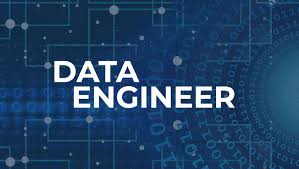

## 4.1 Removing noise

Noise can degrade the quality of data by introducing errors or inconsistencies. Removing noise helps improve the overall quality of the dataset, making it more reliable for analysis and decision-making.It can distort analysis results and lead to erroneous conclusions. By eliminating noise, we can increase the accuracy of data analysis and ensure that insights derived from the data are more meaningful and reliable.

# 4.1.2 removing noise for train data

In [41]:
raw['message'] = raw['message'].str.split()

In [42]:
raw.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,19,12
1,1,"[its, not, like, we, lack, evidence, of, anthr...",126103,10,1
2,2,"[researchers, say, we, have, three, years, to,...",698562,19,12
3,1,"[wired, was, a, pivotal, year, in, the, war, o...",573736,15,8
4,1,"[its, and, a, racist, sexist, climate, change,...",466954,18,8


In [43]:
# steming
stemmer = SnowballStemmer("english")
raw['message'] = raw['message'].apply(lambda x: [stemmer.stem(y) for y in x])

 Stemming is a text normalization technique used in natural language processing (NLP) and information retrieval to reduce words to their root or base form, called the "stem." The process involves removing suffixes and prefixes from words to obtain the root form, which may not always be a valid word itself but represents the core meaning shared by related words.The main goal of stemming is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

In [44]:
raw['message'][2]

['research',
 'say',
 'we',
 'have',
 'three',
 'year',
 'to',
 'act',
 'on',
 'climat',
 'chang',
 'befor',
 'it',
 'too',
 'late',
 '…']

In [45]:
#printing stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stopwords are common words in a language that typically do not contribute much to the overall meaning of a text. Examples of stopwords in English include "the," "is," "and," "in," "on," etc. In natural language processing (NLP), removing stopwords from text data is a common preprocessing step.Stopwords often occur frequently in text data but carry little information about the content or semantics of the text. By removing stopwords, we can reduce the dimensionality of the data, which can lead to more efficient processing and modeling.

In [46]:
#removing stop words
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [47]:
raw['message'] = raw['message'].apply(remove_stop_words)

In [48]:
raw['message'][2]

['research',
 'say',
 'three',
 'year',
 'act',
 'climat',
 'chang',
 'befor',
 'late',
 '…']

In [49]:
#lemmatizing

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Happy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
raw['message'] = raw['message'].apply(mbti_lemma, args=(lemmatizer, ))

Lemmatization is another text normalization technique used in natural language processing (NLP) to reduce words to their base or canonical form, called the "lemma." The process involves identifying and grouping together different inflected forms of a word so that they can be analyzed as a single item.

In [51]:
raw.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,19,12
1,1,"[like, lack, evid, anthropogen, global, warm]",126103,10,1
2,2,"[research, say, three, year, act, climat, chan...",698562,19,12
3,1,"[wire, pivot, year, war, climat, chang]",573736,15,8
4,1,"[racist, sexist, climat, chang, deni, bigot, l...",466954,18,8


In [52]:
raw['message'][2]

['research',
 'say',
 'three',
 'year',
 'act',
 'climat',
 'chang',
 'befor',
 'late',
 '…']

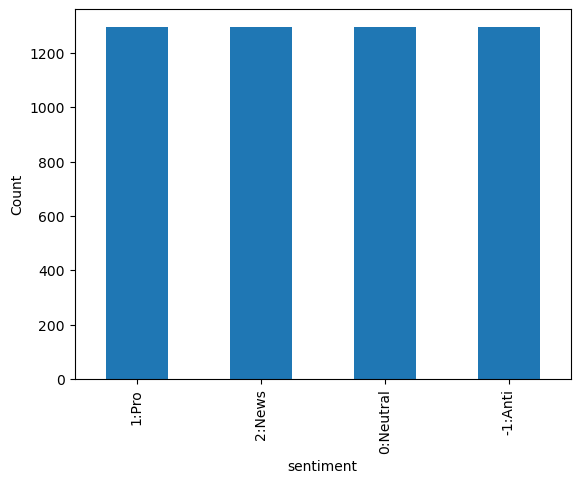

In [53]:
#working on the imbalances
sentiment_counts = raw['sentiment'].value_counts()

minority_class = sentiment_counts.idxmin()
minority_count = sentiment_counts.loc[minority_class]
downsampled_raw = pd.concat([raw[raw['sentiment'] == minority_class]] +
                            [raw[raw['sentiment'] == sentiment].sample(minority_count, replace=False) 
                             for sentiment in sentiment_counts.index if sentiment != minority_class])
ax = downsampled_raw['sentiment'].value_counts().plot(kind='bar')
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in sentiment_counts.index])
ax.set_ylabel('Count')
plt.show()


performs downsampling to address class imbalance in a dataset. Class imbalance refers to a situation where one class (or category) of data significantly outnumbers the others.It calculates the number of occurrences of each sentiment class in the dataset using the value_counts() method on the 'sentiment' column.It then identifies the minority sentiment class, i.e., the sentiment class with the fewest number of occurrences.It performs downsampling by randomly selecting a subset of data points from the majority sentiment classes to match the number of data points in the minority sentiment class. This is done using the sample() method, specifying the replace=False parameter to ensure that each data point is selected only once.

# 4.1.2 removing noise for the test data

In [54]:
#stemming 
stemmer = SnowballStemmer("english")
kg_df['message'] = kg_df['message'].apply(lambda x: [stemmer.stem(y) for y in x])
kg_df['message'][4]

['rt', 'femal', 'orgasm', 'caus', 'global', 'warm', 'sarcast', 'republican']

In [55]:
#removing stop words
kg_df['message']= kg_df['message'].apply(remove_stop_words)
kg_df['message'][4]

['rt', 'femal', 'orgasm', 'caus', 'global', 'warm', 'sarcast', 'republican']

In [56]:
kg_df['message']= kg_df['message'].apply(mbti_lemma, args=(lemmatizer, ))
kg_df['message'][4]

['rt', 'femal', 'orgasm', 'caus', 'global', 'warm', 'sarcast', 'republican']

In [57]:
kg_df["message"] = kg_df["message"].apply(' '.join)
kg_df

,message,tweetid
0,europ look china make sure alon fight climat c...,169760
1,combin poll staffer climat chang woman right f...,35326
2,scari unimpeach evid climat chang alreadi,224985
3,putin got jill trump doesnt believ climat chan...,476263
4,rt femal orgasm caus global warm sarcast repub...,872928
...,...,...
10541,rt brb write poem climat chang …,895714
10542,2016 year climat chang came home dure hottest ...,875167
10543,rt pacif countri posit fiji lead global climat...,78329
10544,rt you'r hot must caus global warm,867455


In [58]:
#creating the two column that should be submitted on kaggle
kg_df_message = kg_df["message"] 
kg_df_tweetid = kg_df["tweetid"]
kg_df_message

0        europ look china make sure alon fight climat c...
1        combin poll staffer climat chang woman right f...
2                scari unimpeach evid climat chang alreadi
3        putin got jill trump doesnt believ climat chan...
4        rt femal orgasm caus global warm sarcast repub...
                               ...                        
10541                     rt brb write poem climat chang …
10542    2016 year climat chang came home dure hottest ...
10543    rt pacif countri posit fiji lead global climat...
10544                   rt you'r hot must caus global warm
10545    rt climat chang global issu onli get wors eat ...
Name: message, Length: 10546, dtype: object

In [59]:
kg_df_message_counts = betterVect.transform(kg_df_message)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
#split the data set into X and Y
y = downsampled_raw['sentiment']
X = downsampled_raw.drop(['sentiment'], axis=1)

In [ ]:
X.head()

In [ ]:
X["message"] = X["message"].apply(' '.join)

In [ ]:
X["message"][56]

In [ ]:
X.head()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we have created classification models that are able to accurately predict the thee sentiments. |

---

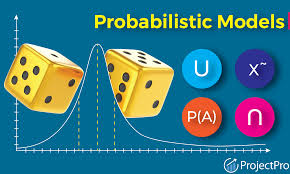

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train =  X_train.drop(['tweetid'], axis=1)
X_test_id =  pd.DataFrame(X_test["tweetid"].reset_index(drop= True))
X_test =  X_test.drop(['tweetid'], axis=1)

In [ ]:
X_test_id

In [ ]:

X_train_fitted = betterVect.fit_transform(X_train["message"])
X_test_counts = betterVect.transform(X_test["message"])


CountVectorizer is a class in scikit-learn's feature extraction module (sklearn.feature_extraction.text) used to convert text data into a matrix of token counts. Each row in the matrix represents a document (or text sample), and each column represents a unique word (or token) in the corpus. The values in the matrix represent the frequency of each word in the corresponding document.

# 5.1 Logistic regression model

Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict the probability that an instance belongs to a particular class. Despite its name, logistic regression is actually a classification algorithm, not a regression algorithm. It's commonly used in various fields, including machine learning, statistics, and social sciences, for tasks such as spam detection, disease diagnosis, and credit risk analysis.

In [ ]:
# train the logistic regression model.
lr = LogisticRegression(max_iter= 10000000000)
lr.fit(X_train_fitted.toarray(), y_train)

In [ ]:
predictions = lr.predict(X_test_counts)
print(predictions)

In [ ]:
#Intercept
lr.intercept_[0]

In [ ]:
#Confusion Matrix
labels = ['-1:Anti','0:Neutral','1:Pro','2:News']

pd.DataFrame(data=confusion_matrix(y_test, predictions), index=labels, columns=labels)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

The F1 score is a metric used to evaluate the performance of a classification model, especially in binary classification tasks. It is the harmonic mean of precision and recall, providing a single measure that balances both metrics.the F1 score is a useful metric for evaluating the overall performance of a classification model, especially in scenarios where both precision and recall are important. It provides a single score that captures the trade-off between making accurate positive predictions (precision) and capturing all positive instances (recall).

In [ ]:

#print(metrics.classification_report(y_test, predictions))


In [ ]:

f1=f1_score(y_test,predictions, average = 'weighted')
precision = precision_score(y_test,predictions, average = 'weighted')
recall = recall_score(y_test,predictions, average = 'weighted')

In [ ]:
params={"random_state":42,
       "model_type":"LogisticRegression",
        "max_iter":10000000000
       }
metrics={"f1":f1,
        "recall":recall,
        "precision":precision}

In [123]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
new_df = pd.DataFrame()

In [ ]:
#creating the two column that should be submitted on kaggle
kg_df_message = kg_df["message"] 
kg_df_tweetid = kg_df["tweetid"]
kg_df_message

In [ ]:
kg_df_message_counts = betterVect.transform(kg_df_message)

In [ ]:
predictions_kg = lr.predict(kg_df_message_counts)

In [ ]:
predictions_kg

In [ ]:
lr_pred = pd.DataFrame(predictions_kg)
lr_pred = lr_pred.rename(columns = {0:"sentiment"})

results = pd.merge(kg_df_tweetid, lr_pred, left_index =True, right_index =True)

results.to_csv("logistic_predictions2.plk", index = False)
results

#  5.2 Gaussian Naive Bayes model

Gaussian Naive Bayes (GNB) is a variant of the Naive Bayes classifier, which is a probabilistic classification algorithm based on Bayes' theorem. GNB is specifically designed for classification tasks where the features follow a Gaussian (normal) distribution.GNB, like other Naive Bayes models, makes the assumption of feature independence given the class label. This means that each feature in the dataset is considered independent of all other features, given the class label. Although this assumption may not hold true in many real-world scenarios, Naive Bayes classifiers often perform well in practice despite this simplification.

In [ ]:
naive_bayes = GaussianNB()
# Fit the model 
naive_bayes.fit(X_train_fitted.toarray(), y_train)

In [ ]:
#train data predictions
predictions_nb = naive_bayes.predict(X_test_counts.toarray())
print(predictions_nb)

In [ ]:
#test data predictions 
predictions_nbtest = naive_bayes.predict(kg_df_message_counts.toarray())
print(predictions_nbtest)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_nb, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:
f1=f1_score(y_test,predictions_nb, average = 'weighted')
precision = precision_score(y_test,predictions_nb, average = 'weighted')
recall = recall_score(y_test,predictions_nb, average = 'weighted')

In [ ]:
nb_params={"model_type":"Gaussian Naive Bayes"}
metric={"f1":f1,
        "recall":recall,
        "precision":precision}

In [ ]:
experiment.log_parameters(parameter)
experiment.log_metrics(metric)

# Kaggle submision file for the Gaussian Naive Bayes model

In [ ]:
bn_pred = pd.DataFrame(predictions_nbtest)
bn_pred = bn_pred.rename(columns = {0:"sentiment"})

results = pd.merge(kg_df_tweetid, bn_pred, left_index =True, right_index =True)
#saving the new file
results.to_csv("bn_predictions.csv", index = False)
results

# 5.3 K-nearest neighbours(KNN) model

In [ ]:

n_neighbors = 1

knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train_fitted.toarray(), y_train)

In [ ]:
#train predictions
predictions_knn = knn.predict(X_test_counts)
print(predictions_knn)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_knn, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:
#test data predictions 
predictions_kntest = knn.predict(kg_df_message_counts)
print(predictions_kntest)

In [ ]:
f1=f1_score(y_test,predictions_knn, average = 'weighted')
precision = precision_score(y_test,predictions_knn, average = 'weighted')
recall = recall_score(y_test,predictions_knn, average = 'weighted')

In [ ]:
knn_params={"n_neighbors":1,
            "model_type":" KNN"
           }
metric={"f1":f1,
        "recall":recall,
        "precision":precision}

In [160]:
experiment.log_parameters(knn_params)
experiment.log_metrics(metric)

# Kaggle submision file for the KNN model


K-Nearest Neighbors (KNN) is a simple and intuitive algorithm used for both classification and regression tasks in machine learning. It is a non-parametric and instance-based learning algorithm, meaning it doesn't make assumptions about the underlying data distribution and instead learns directly from the training instances.It does not have a traditional training phase as it does not learn explicit models from the training data. Instead, it stores all the training instances in memory.  Given a new, unlabeled instance, KNN classifies it based on the majority class among its K nearest neighbors. The class is determined by a simple majority vote among the K nearest neighbors, where each neighbor contributes equally to the decision. The distance metric, typically Euclidean distance, is used to measure the proximity or similarity between instances.

In [ ]:
kn_pred = pd.DataFrame(predictions_kntest)
kn_pred = kn_pred.rename(columns = {0:"sentiment"})

results = pd.merge(kg_df_tweetid, kn_pred, left_index =True, right_index =True)

results.to_csv("knn_predictions.csv", index = False)
results

## 5.4 Support vector machine

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is effective in high-dimensional spaces and is widely used for tasks such as classification of images, text, and bioinformatics data. SVM can also be used for regression tasks and outlier detection.

In [75]:
svc = SVC(kernel='linear')
svc.fit(X_train_fitted.toarray(), y_train)


SVC(kernel='linear')

In [77]:
predictions_svc = svc.predict(X_test_counts.toarray())
print(predictions_svc)

[-1  0  2 ... -1 -1  2]


In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_svc, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:


params = {
    "C": [0.001,0.010,50,55,60,70],
    "kernel": ['rbf','poly','sigmoid'],

}

In [ ]:
grid = GridSearchCV(SVC(), params)
grid.fit(X_train_fitted, y_train)

grid.best_params_

In [ ]:
scv2 = SVC(**grid.best_params_)

scv2.fit(X_train_fitted, y_train)


In [ ]:
predictions_svc = scv2.predict(X_test_counts)
print(predictions_svc)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_svc, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:
f1=f1_score(y_test,predictions_svc, average = 'weighted')
precision = precision_score(y_test,predictions_svc, average = 'weighted')
recall = recall_score(y_test,predictions_svc, average = 'weighted')

In [ ]:
svc_params={"kernel":"linear",
           "model_type":" SVC"}
metric={"f1":f1,
        "recall":recall,
        "precision":precision}

In [ ]:
experiment.log_parameters(svc_params)
experiment.log_metrics(metric)

## 5.5 LinearSVC

LinearSVC stands for Linear Support Vector Classifier. It is a machine learning algorithm used for binary classification tasks, where the goal is to predict which of the two possible classes a given input belongs to.It constructs a linear decision boundary that separates the classes in the feature space. The decision boundary is determined by a hyperplane, which is a subspace whose dimensionality is one less than that of the original feature space. It aims to find the optimal hyperplane that maximizes the margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class. By maximizing the margin, LinearSVC aims to achieve better generalization performance on unseen data.

In [ ]:
def replace_pattern(input_txt, pattern):
    regex = re.findall(pattern, input_txt)
    for i in regex:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [ ]:
df_copy['message'] = np.vectorize(replace_pattern)(df_copy['message'], "@[\w]*") 
kg_copy['message'] = np.vectorize(replace_pattern)(kg_copy['message'], "@[\w]*") 

In [ ]:
def  data_cleaning(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
#test_clean = clean_text(clean_test_df, "message")
df_clean = data_cleaning(df_copy,"message")
kg_clean = data_cleaning(kg_copy,"message")

In [ ]:
#A function that removes punctuations
def remove_punctuations(text):
    table = str.maketrans("","",string.punctuation)
    txt = text.translate(table)
    return txt


In [ ]:
["message"] = df_clean['message'].apply(remove_punctuations)
kg_clean["message"] = kg_clean['message'].apply(remove_punctuations)

In [ ]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    r = " ".join(text)
    return r
#removing stop words from the message column
df_clean["message"]=df_clean["message"].apply(remove_stopwords)
#visualing the cleaned dataframe
df_clean.head()

In [110]:
# splitting the training data
X = df_copy['message']  
y = df_copy['sentiment']
Xt = kg_df['message']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
X_train

2239     Iran, Pakistan vow to boost cooperation on cli...
10956    @EvanLSoloman have Craig Oliver explain climat...
7252     Eight #photographers discuss the effects of cl...
14404    RT @MattBors: Florida. Half the state's going ...
13155    RT @JeanetteJing: DNC Chair candidate @keithel...
                               ...                        
13418    RT @safeagain1: Russia's oil and gas industry ...
5390     RT @businessinsider: A climate change skeptic ...
860      RT @BramnessEllen: We need to tap into the sci...
15795    China’s coal use drops, showing commitment to ...
7270     RT @ClimateCentral: 35 seconds. More than 100 ...
Name: message, Length: 11073, dtype: object

In [112]:
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline
# this is a pipeline for a trial model
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [113]:
predictions_pipeline= text_clf.predict(X_test)
print(predictions_pipeline)

[1 2 1 ... 1 1 1]


In [115]:
pickle.dump(text_clf, open('clf_pipeline.pkl', "wb"))

In [181]:
print('Classification Report')
print(classification_report(y_test,predictions_pipeline, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

Classification Report
              precision    recall  f1-score   support

     -1:Anti       0.74      0.47      0.57       401
   0:Neutral       0.62      0.43      0.51       666
       1:Pro       0.78      0.85      0.82      2598
      2:News       0.73      0.80      0.76      1081

    accuracy                           0.75      4746
   macro avg       0.72      0.64      0.66      4746
weighted avg       0.74      0.75      0.74      4746



In [182]:
predictions_tests = text_clf.predict(kg_df["message"])
print(predictions_tests)

[1 0 1 ... 1 0 0]


In [183]:
clf_pred = pd.DataFrame(predictions_tests)
clf_pred = clf_pred.rename(columns = {0:"sentiment"})

results = pd.merge(kg_df["tweetid"], clf_pred, left_index =True, right_index =True)

results.to_csv("clf_predictions.csv", index = False)
results

,tweetid,sentiment
0,169760,1
1,35326,0
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0


In [185]:
f1=f1_score(y_test,predictions_pipeline, average = 'weighted')
precision = precision_score(y_test,predictions_pipeline, average = 'weighted')
recall = recall_score(y_test,predictions_pipeline, average = 'weighted')

In [186]:
clf_params={"model_type":" LinearSVC"}
clf_metric={"f1":f1,
        "recall":recall,
        "precision":precision}

In [187]:
experiment.log_parameters(clf_params)
experiment.log_metrics(clf_metric)

#  5.6 Decision Tree Classification Model

A Decision Tree is a popular supervised learning algorithm used for both classification and regression tasks in machine learning. It's a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the outcome or label. Decision trees are easy to interpret and visualize, making them a popular choice for various applications.

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_fitted, y_train)


In [ ]:
predictions_dt = dt.predict(X_test_counts)
print(predictions_dt)

In [ ]:
confusion_matrix(y_test, predictions_dt)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_dt, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:
params = {
    "max_depth": [2,7,50,55,60,70],
    "min_samples_leaf": [5,7,9,10,20,25,30,35,45,50]
}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train_fitted, y_train)

grid.best_params_

In [ ]:
dt2 = DecisionTreeClassifier(**grid.best_params_)

dt2.fit(X_train_fitted, y_train)


In [ ]:
predictions_dt2 = dt2.predict(X_test_counts)
print(predictions_dt2)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test,predictions_dt2, target_names=['-1:Anti','0:Neutral','1:Pro','2:News']))

In [ ]:
f1=f1_score(y_test,predictions_dt, average = 'weighted')
precision = precision_score(y_test,predictions_dt, average = 'weighted')
recall = recall_score(y_test,predictions_dt, average = 'weighted')

In [ ]:
dt_params={"model_type":" SVC"}
metric={"f1":f1,
        "recall":recall,
        "precision":precision}

In [ ]:
experiment.log_parameters(dt_params)
experiment.log_metrics(metric)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| Compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [81]:
pickle.dump(lr, open('Climant_change_sentiment2.pkl', "wb"))
pickle.dump(svc, open('svc.pkl', "wb"))
pickle.dump(naive_bayes, open('naive_bayes.pkl', "wb"))
pickle.dump(knn, open('knn.pkl', "wb"))
pickle.dump(betterVect, open('betterVect_sentiment.pkl', "wb"))



In [193]:
experiment.end()


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/m-anza/classification-project/fdc20a5853984638bac67f9b9b9bc7e6
COMET INFO:   Others:
COMET INFO:     Name : svc
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following module